# Fixed param optimization

In [2]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib 
from matplotlib import pyplot as plt 
import GPy

In [3]:
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.05 

In [4]:
k = GPy.kern.RBF(1)

mFV = GPy.models.GPRegression(X, Y, k, normalizer=True)
mFV.rbf.variance.constrain_fixed(3)
mFV.optimize()
mFV

GP_regression.,value,constraints,priors
rbf.variance,3.0,+ve fixed,
rbf.lengthscale,2.04239672855,+ve,
Gaussian_noise.variance,0.00203248205292,+ve,


# Linear  Slope Kernels

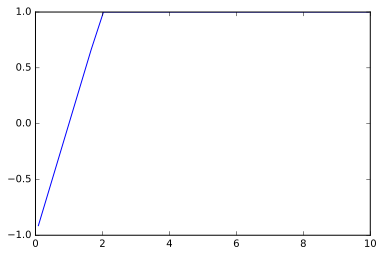

In [5]:
from GPy.kern import LinearSlopeBasisFuncKernel,  BasisFuncKernel, ChangePointBasisFuncKernel

x = np.random.uniform(0, 10, 100)[:,None]
x.sort(0)

kDiet = LinearSlopeBasisFuncKernel(1, start=0, stop=2, variance=1., ARD=1)

PhiDiet = kDiet.phi(x)

plt.plot(x, PhiDiet)

# Create a function bassis 

In [26]:
# broadcasting
# https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.power.html
# https://stackoverflow.com/questions/3213212/matlab-equivalent-of-numpy-broadcasting
#

# vectorize 
# https://stackoverflow.com/questions/7701429/efficient-evaluation-of-a-function-at-every-cell-of-a-numpy-array

x = np.arange(0, 5)
p = np.arange(1, 3)
vecPow = np.vectorize(np.power)

np.power(x, p)

ValueError: operands could not be broadcast together with shapes (5,) (2,) 

In [27]:
x1 = range(6)
x2 = np.array([[1, 1, 1, 1, 1, 1], [1, 2, 3, 3, 2, 1]])

np.power(x1, x2)

array([[ 0,  1,  2,  3,  4,  5],
       [ 0,  1,  8, 27, 16,  5]], dtype=int32)

## Need to work on the other basis functions

In [29]:
F = 5
nObs = len(x)
phiX = np.zeros((F, nObs))
for f in range(0, F):
    a = (f+1)/F
    phif = np.array(np.cos(a*x), ndmin=2)
    phiX[f,:] = phif

Oobs = np.ones((nObs, 1)).T
phiX = np.concatenate((Oobs, phiX), axis=0)

xnew = np.arange(-5.5, 5.5, 0.1)
nNew = len(xnew)
phix = np.zeros((F, nNew))
for f in range(0, F):
    a = (f+1)/F
    phif = np.array(np.cos(a*xnew), ndmin=2)
    phix[f,:] = phif

Onew = np.ones((nNew, 1)).T
phix = np.concatenate((Onew, phix), axis=0)

# prior on w
mu = np.zeros((F+1, 1))
S = np.eye(F+1)

# use .shape to get the dimensions of a matrix. 
Y = np.array(y, ndmin=2).T
m = phix.T.dot(mu)
M = phiX.T.dot(mu)

kxx = (phix.T).dot(S).dot(phix)
kxX = (phix.T).dot(S).dot(phiX)
kXX = (phiX.T).dot(S).dot(phiX) + 0.01 * np.eye(len(Xobs)) # add noise to have a pos def. 

IkXX = np.linalg.inv(kXX)

mpost = m + kxX.dot(IkXX).dot((Y - M))
vpost = kxx - kxX.dot(IkXX).dot(kxX.T)
sdpost = np.array(np.sqrt(vpost.diagonal()), ndmin=2).T

plt.plot(xnew, mpost, color="#F8766D", linewidth=3)
plt.plot(xnew, mpost + 20*sdpost, color="#F8766D", linewidth=2, alpha=0.3)
plt.plot(xnew, mpost - 20*sdpost, color="#F8766D", linewidth=2, alpha=0.3)
plt.errorbar(x, y, yerr=1, fmt='+', color="#00BFC4")


NameError: name 'y' is not defined

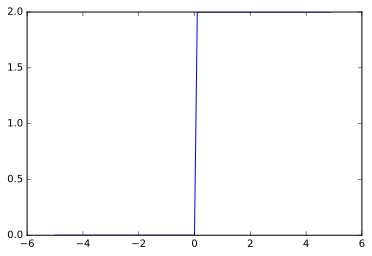

In [34]:
x = np.arange(-5, 5, 0.1)
y = np.sign(x) 

plt.plot(x, y)